<a href="https://colab.research.google.com/github/Mallesh06/VOIS_AICTE_Oct2025_MajorProject_PeddagollaMallesham/blob/main/Netflix_dataset_Analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Netflix Dataset.csv to Netflix Dataset (1).csv


In [9]:
df = pd.read_csv("Netflix Dataset.csv")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [11]:
df.duplicated().value_counts()

,count
False,7787
True,2


In [12]:
df.shape

(7789, 11)

In [13]:
df.describe()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
count,7789,7789,7789,5401,7071,7282,7779,7782,7789,7789,7789
unique,7787,2,7787,4050,6831,681,1565,14,216,492,7769
top,s6621,Movie,The Lost Okoroshi,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,2,5379,2,18,18,2556,118,2865,1608,334,3


In [14]:
df.isnull().sum()
df = df.dropna()

In [15]:
df.drop_duplicates(inplace=True)


In [16]:
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())

Dataset Shape: (4809, 11)

Columns: ['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country', 'Release_Date', 'Rating', 'Duration', 'Type', 'Description']


In [17]:
# Check data types and non-null values
df.info()

# Check missing values
print("\nMissing Values per Column:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
Index: 4809 entries, 1 to 7785
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       4809 non-null   object
 1   Category      4809 non-null   object
 2   Title         4809 non-null   object
 3   Director      4809 non-null   object
 4   Cast          4809 non-null   object
 5   Country       4809 non-null   object
 6   Release_Date  4809 non-null   object
 7   Rating        4809 non-null   object
 8   Duration      4809 non-null   object
 9   Type          4809 non-null   object
 10  Description   4809 non-null   object
dtypes: object(11)
memory usage: 450.8+ KB

Missing Values per Column:
 Show_Id         0
Category        0
Title           0
Director        0
Cast            0
Country         0
Release_Date    0
Rating          0
Duration        0
Type            0
Description     0
dtype: int64


In [18]:
# Describe non-numeric columns
df.describe(include='object')


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
count,4809,4809,4809,4809,4809,4809,4809,4809,4809,4809,4809
unique,4809,2,4809,3614,4689,544,1291,14,195,324,4804
top,s7784,Movie,Zubaan,"Raúl Campos, Jan Suter",Samuel West,United States,"January 1, 2020",TV-MA,93 min,"Dramas, International Movies",A young Han Solo tries to settle an old score ...
freq,1,4673,1,18,10,1654,100,1666,121,306,2


In [22]:
# Drop duplicate records
df.drop_duplicates(inplace=True)

# Convert Release_Date to datetime
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

# Clean duration column (for movies/TV shows)
df['Duration'] = df['Duration'].str.replace(' min', '').str.replace(' Season', '').str.replace('s', '')

# Fill missing values (optional)
df['Country'].fillna('Unknown', inplace=True)
df['Rating'].fillna('Unknown', inplace=True)

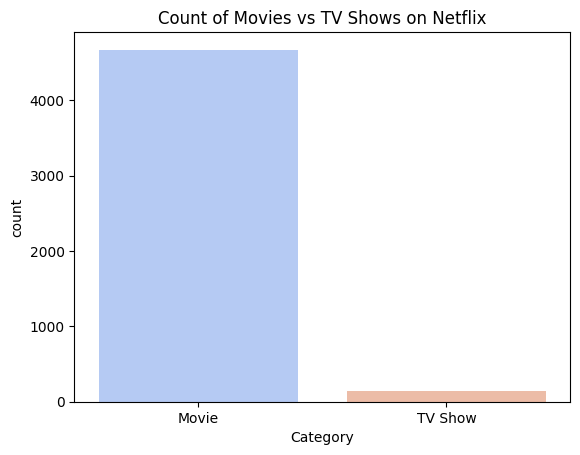

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Category', data=df, palette='coolwarm')
plt.title('Count of Movies vs TV Shows on Netflix')
plt.show()

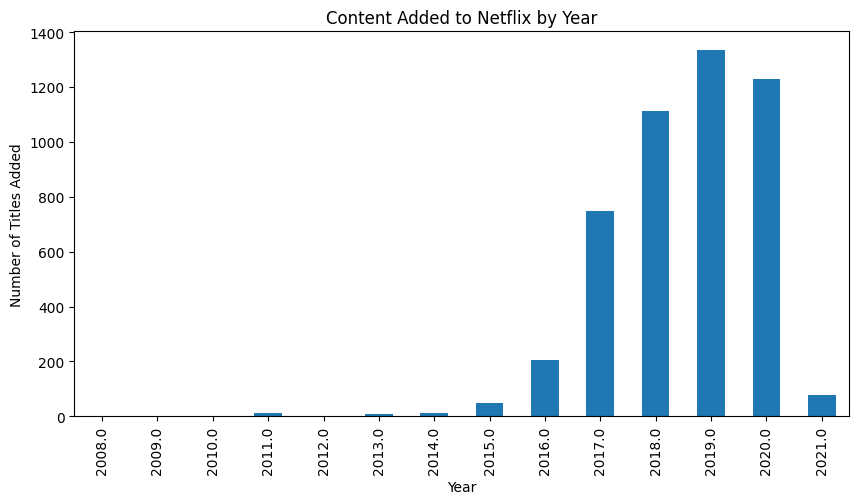

In [26]:
df['year_added'] = df['Release_Date'].dt.year
df['year_added'].value_counts().sort_index().plot(kind='bar', figsize=(10,5))
plt.title('Content Added to Netflix by Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.show()

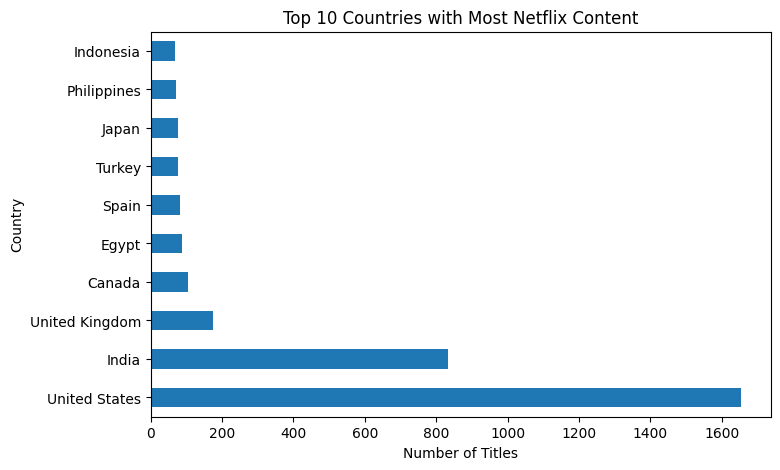

In [28]:
top_countries = df['Country'].value_counts().head(10)
top_countries.plot(kind='barh', figsize=(8,5))
plt.title('Top 10 Countries with Most Netflix Content')
plt.xlabel('Number of Titles')
plt.show()

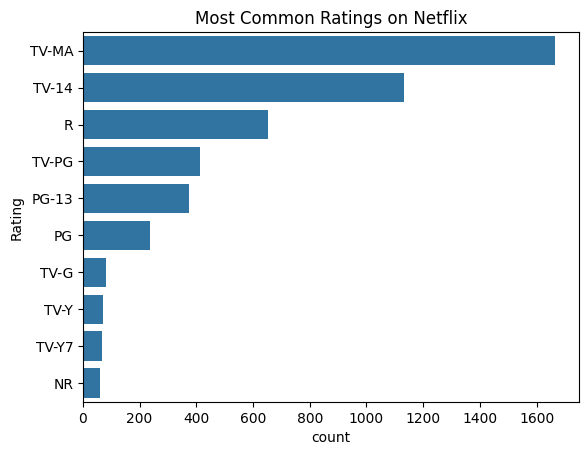

In [30]:
sns.countplot(y='Rating', data=df, order=df['Rating'].value_counts().index[:10])
plt.title('Most Common Ratings on Netflix')
plt.show()

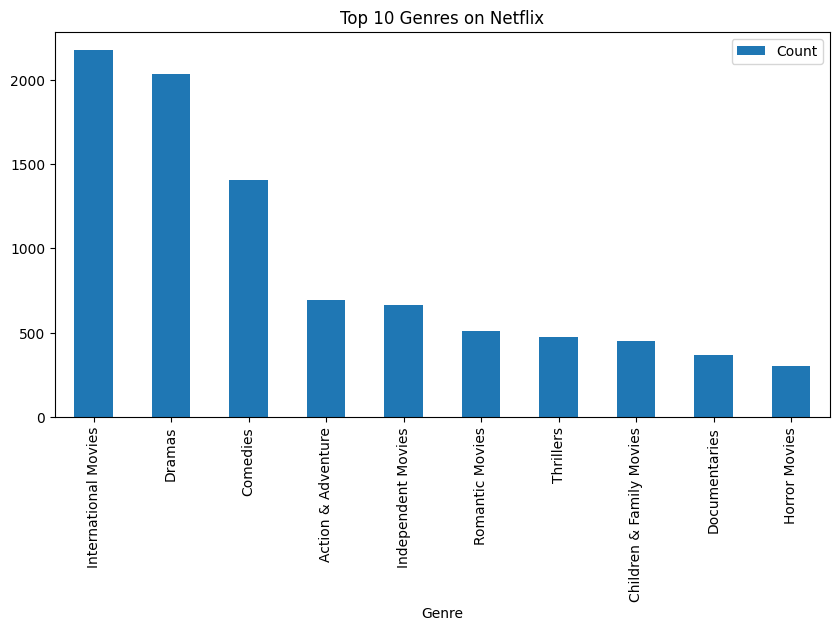

In [32]:
from collections import Counter

# Split and count genres
genres = df['Type'].dropna().apply(lambda x: [i.strip() for i in x.split(',')])
genre_count = Counter([g for sublist in genres for g in sublist])

pd.DataFrame(genre_count.most_common(10), columns=['Genre', 'Count']).set_index('Genre').plot(kind='bar', figsize=(10,5))
plt.title('Top 10 Genres on Netflix')
plt.show()